# Study cocktail as a function of 2 Ab and check science paper results

Plotting AUC to compare predicted mutations and real mutations

In [104]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

# def plot_density(x, y, ax, cmap='Blues', alpha=0.5):
#     xy = np.vstack([x,y])
#     z = gaussian_kde(xy)(xy)
#     ax.scatter(x, y, c=z, s=100)
#     return ax

# x=np.random.randn(1000)
# y=np.random.randn(1000)
# fig, ax = plt.subplots() 
# plot_density(x, y, ax)
# plt.show()

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import random
import os
sys.path.append("..")
from global_variables import *
from escape_map import EscapeMap, load_escape_map_from_csv,gen_artif_data, score_seq_batch
from utils import get_Kd

pgm_dir=('../')
sys.path.append(pgm_dir+'./utilities')

# Now safe to import
import utilities, Proteins_utils, sequence_logo, plots_utils
import rbm, RBM_utils  # rbm.py must be alongside this file

In [106]:
train_date = pd.Timestamp("2020-07-01")  # or any date-like



em_path = "../params_by_period_0.03_m1_m8_m7/param_period_"+train_date.strftime("%Y-%m-%d")+".csv"


In [107]:
ab_names=list(KD_VECTORS.keys())
#fin indexes of REGN10933','REGN10987'
ab_index_1=ab_names.index('REGN10933')
ab_index_2=ab_names.index('REGN10987')

print(ab_index_1,ab_index_2)

14 15


# Best mutations in case of unique antibody

In [108]:
df_bloom=pd.read_csv('../exp_data/starr_science/bloom_deep_scan_ACE2_with_sequence.csv')
df_bloom=df_bloom[df_bloom['site_SARS2']>=349] 
df_bloom=df_bloom[df_bloom['site_SARS2']<=526]
#reset index
df_bloom=df_bloom.reset_index(drop=True)
#sequence column to fasta file
with open('../exp_data/starr_science/bloom_deep_scan_ACE2_with_sequence.fasta', 'w') as f:
    for index, row in df_bloom.iterrows():
        #if * in sequence, remove sequence
        if '*' in row['sequence']:
            continue
        f.write('>' + str(index) + '\n')
        f.write(row['sequence'] + '\n')
df_bloom

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,sequence
0,19,349,S,A,S349A,S19A,-0.35,-0.32,-0.34,-1.37,-0.89,-1.13,NITNLCPFGEVFNATRFAAVYAWNRKRISNCVADYSVLYNSASFST...
1,19,349,S,C,S349C,S19C,0.00,-0.24,-0.12,-3.09,-0.97,-2.03,NITNLCPFGEVFNATRFACVYAWNRKRISNCVADYSVLYNSASFST...
2,19,349,S,D,S349D,S19D,-0.48,-0.52,-0.50,-1.06,-1.21,-1.14,NITNLCPFGEVFNATRFADVYAWNRKRISNCVADYSVLYNSASFST...
3,19,349,S,E,S349E,S19E,-1.08,-1.23,-1.15,-2.22,-2.04,-2.13,NITNLCPFGEVFNATRFAEVYAWNRKRISNCVADYSVLYNSASFST...
4,19,349,S,F,S349F,S19F,-1.96,-2.11,-2.03,-2.67,-2.33,-2.50,NITNLCPFGEVFNATRFAFVYAWNRKRISNCVADYSVLYNSASFST...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,196,526,G,R,G526R,G196R,-0.08,-0.08,-0.08,-0.19,-0.40,-0.30,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
3323,196,526,G,S,G526S,G196S,0.00,-0.05,-0.02,-0.14,-0.13,-0.14,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
3324,196,526,G,T,G526T,G196T,0.05,-0.04,0.01,-0.20,-0.11,-0.15,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
3325,196,526,G,V,G526V,G196V,-0.07,-0.02,-0.04,-0.12,-0.13,-0.12,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...


### Make predictions

In [109]:
bloom_sequences=Proteins_utils.load_FASTA('../exp_data/starr_science/bloom_deep_scan_ACE2_with_sequence.fasta')
print('shape of sequences:', np.shape(bloom_sequences))
bloom_sequences = [seq[BEGIN:-END] for seq in bloom_sequences]
bloom_sequences=np.array(bloom_sequences)
# bloom_sequences=one_hot_encode_matrix(bloom_sequences)


bloom_sequences.shape

shape of sequences: (3327, 201)


(3327, 178)

In [110]:
WT_embe=Proteins_utils.load_FASTA('../seq_data/rbd_wt.fasta')
WT_embe = [seq[BEGIN:-END] for seq in WT_embe]
WT_seq=np.array(WT_embe)




In [111]:
import torch

c=-5



In [112]:
import pandas as pd
print('ab_name_1:',ab_names[ab_index_1])
# Assume c_values and other required variables are defined
results = []


print('c:', c)
model=load_escape_map_from_csv(em_path)
model.raw_concentrations=model.raw_concentrations*0-12
#print concentration
print('concentration:',model.raw_concentrations)
model.raw_concentrations[ab_index_1] = c
# for s in bloom_sequences:
#     print(s)

energies = [model(s) for s in bloom_sequences]

df_bloom['E_ACE2_RBM_AB'] = energies
E_wt = model(WT_seq).item()
df_bloom['-deltaE_ACE2_RBM_AB'] = E_wt- df_bloom['E_ACE2_RBM_AB']




concentrations = torch.full((29,), -25)
model=load_escape_map_from_csv(em_path)
model.raw_concentrations=model.raw_concentrations*0-12
model.raw_concentrations[ab_index_1] = c
model.raw_ace2=-12

model.raw_beta=-10
energies = [model(torch.tensor(s, dtype=torch.int16)).item() for s in bloom_sequences]
df_bloom['E_AB'] = energies
E_wt = model(WT_seq)
df_bloom['-deltaE_AB'] = E_wt - df_bloom['E_AB']
#keep only one nucleotide away
# df_bloom_trimmed = df_bloom[df_bloom['one_nucleotide_away']]
# df_bloom_avg = df_bloom_trimmed.groupby(['site_SARS2']).mean().reset_index()


df_bloom_avg = df_bloom.groupby('site_SARS2').agg(lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.iloc[0]).reset_index()
df_bloom_avg
    


ab_name_1: REGN10933
c: -5
concentration: [-12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12.]


,site_SARS2,site_RBD,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,sequence,E_ACE2_RBM_AB,-deltaE_ACE2_RBM_AB,E_AB,-deltaE_AB
0,349,19.0,S,A,S349A,S19A,-1.153684,-1.152105,-1.152105,-1.941053,-1.807895,-1.875263,NITNLCPFGEVFNATRFAAVYAWNRKRISNCVADYSVLYNSASFST...,-1467.653564,-9.244706,7.850393,-0.231119
1,350,20.0,V,A,V350A,V20A,-2.873333,-2.721667,-2.798889,-2.285000,-2.210000,-2.247222,NITNLCPFGEVFNATRFASAYAWNRKRISNCVADYSVLYNSASFST...,-1462.350220,-14.548183,8.519248,-0.899974
2,351,21.0,Y,A,Y351A,Y21A,-1.035789,-1.073158,-1.055263,-1.898421,-1.785789,-1.842632,NITNLCPFGEVFNATRFASVAAWNRKRISNCVADYSVLYNSASFST...,-1465.968994,-10.929379,7.810236,-0.190962
3,352,22.0,A,C,A352C,A22C,-0.310000,-0.360526,-0.335263,-0.957368,-0.898421,-0.927368,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,-1466.511353,-10.387117,7.857793,-0.238519
4,353,23.0,W,A,W353A,W23A,-1.598421,-1.606842,-1.603684,-2.225263,-2.206842,-2.214211,NITNLCPFGEVFNATRFASVYAANRKRISNCVADYSVLYNSASFST...,-1463.656738,-13.241404,7.743981,-0.124708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,522,192.0,A,C,A522C,A192C,-0.003158,-0.018947,-0.011053,-0.051579,-0.177895,-0.115263,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1467.049561,-9.848889,7.854742,-0.235469
174,523,193.0,T,A,T523A,T193A,-0.018333,-0.036667,-0.028333,-0.258333,-1.110000,-0.686667,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1465.230347,-11.668111,7.799343,-0.180070
175,524,194.0,V,A,V524A,V194A,-0.552000,-0.034000,-0.294000,0.026000,-0.636000,-0.306000,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1467.087891,-9.810425,7.829171,-0.209897
176,525,195.0,C,A,C525A,C195A,-0.203889,-0.095556,-0.150000,-0.352222,-0.620000,-0.487778,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1463.382080,-13.516337,7.833612,-0.214338


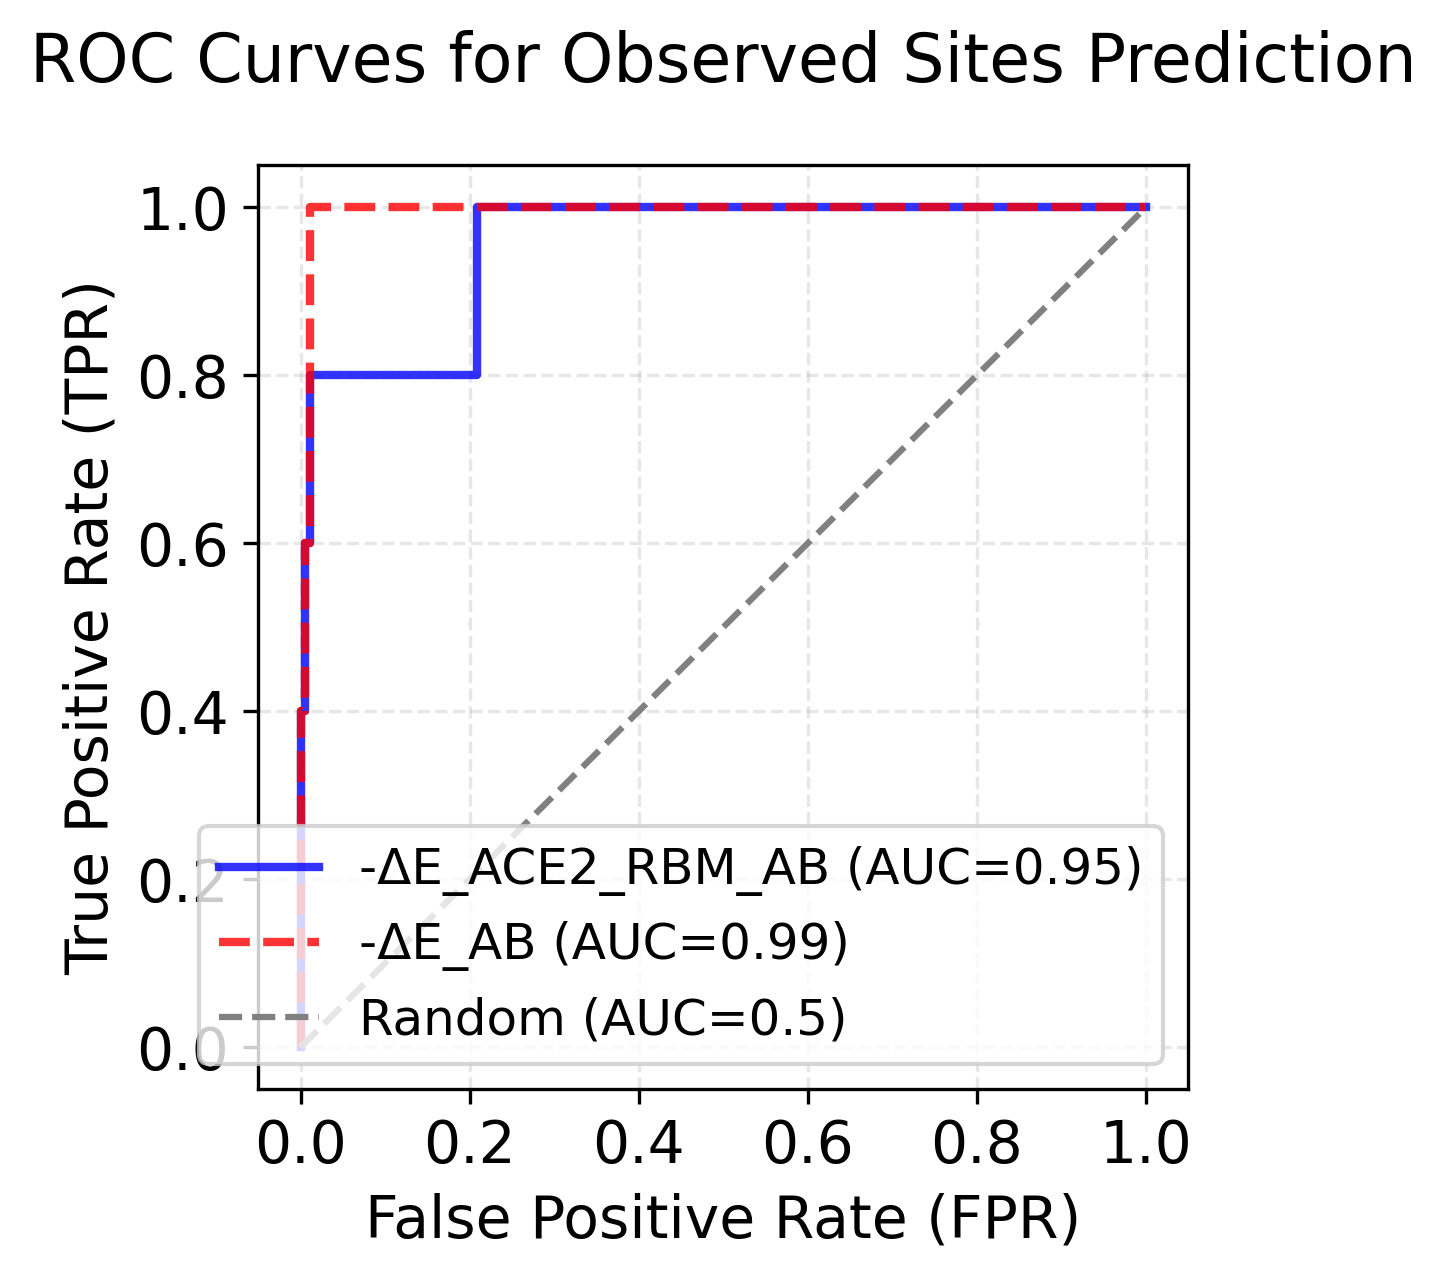

In [113]:
# Add observed_label column
from sklearn.metrics import roc_curve, auc
observed_sites = [417, 453, 455, 486, 493]
df_bloom_avg['observed_label'] = df_bloom_avg['site_SARS2'].isin(observed_sites).astype(int)

# Compute ROC curves
fpr1, tpr1, _ = roc_curve(df_bloom_avg['observed_label'], df_bloom_avg['-deltaE_ACE2_RBM_AB'])
auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(df_bloom_avg['observed_label'], df_bloom_avg['-deltaE_AB'])
auc2 = auc(fpr2, tpr2)

# Plot
plt.figure(figsize=(4, 4), dpi=300)

plt.plot(fpr1, tpr1, linestyle='-', color='b', linewidth=2, alpha=0.8, 
         label=f"-ΔE_ACE2_RBM_AB (AUC={auc1:.2f})")
plt.plot(fpr2, tpr2, linestyle='--', color='r', linewidth=2, alpha=0.8, 
         label=f"-ΔE_AB (AUC={auc2:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label='Random (AUC=0.5)')

plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curves for Observed Sites Prediction', fontsize=16, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=12, frameon=True)
plt.grid(alpha=0.3, linestyle='--')
plt.show()

In [114]:
top10_df

,site_SARS2,site_RBD,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,sequence,E_ACE2_RBM_AB,-deltaE_ACE2_RBM_AB,E_AB,-deltaE_AB,observed_label
97,446,116.0,G,A,G446A,G116A,-0.223158,-0.294737,-0.257895,-0.402632,-0.498421,-0.449474,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1474.256836,-2.777344,3.246009,4.194271,0
95,444,114.0,K,A,K444A,K114A,-0.153158,-0.188421,-0.170526,-0.218947,-0.173684,-0.194737,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1476.979248,-0.055022,3.413311,4.026969,1
96,445,115.0,V,A,V445A,V115A,-0.096316,-0.126316,-0.111579,-0.104737,-0.110526,-0.108947,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1475.735596,-1.298668,3.469806,3.970474,1
98,447,117.0,G,A,G447A,G117A,-1.539474,-1.617368,-1.578421,-0.553158,-0.406842,-0.480526,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1473.901245,-3.133089,3.601801,3.838479,0
99,448,118.0,N,A,N448A,N118A,-0.885789,-0.985789,-0.935263,-0.728421,-0.700526,-0.714211,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1469.249512,-7.784764,4.177809,3.262470,0
150,499,169.0,P,A,P499A,P169A,-0.471579,-0.587368,-0.529474,-0.628947,-0.399474,-0.514211,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1474.334351,-2.699836,4.352705,3.087574,0
91,440,110.0,N,A,N440A,N110A,-0.018421,-0.050526,-0.034211,-0.278947,-0.241053,-0.258947,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1471.749756,-5.284398,5.202126,2.238154,0
94,443,113.0,S,A,S443A,S113A,-1.860526,-2.003684,-1.931053,-1.036316,-0.959474,-0.997895,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1473.796997,-3.237292,6.123785,1.316495,0
158,507,177.0,P,A,P507A,P177A,-4.005263,-4.064211,-4.034211,-2.329474,-2.172632,-2.251579,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1468.389526,-8.644942,6.231197,1.209082,0
90,439,109.0,N,A,N439A,N109A,-0.598421,-0.874211,-0.736842,-0.941579,-0.538421,-0.740000,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1472.636841,-4.397403,6.337533,1.102746,0


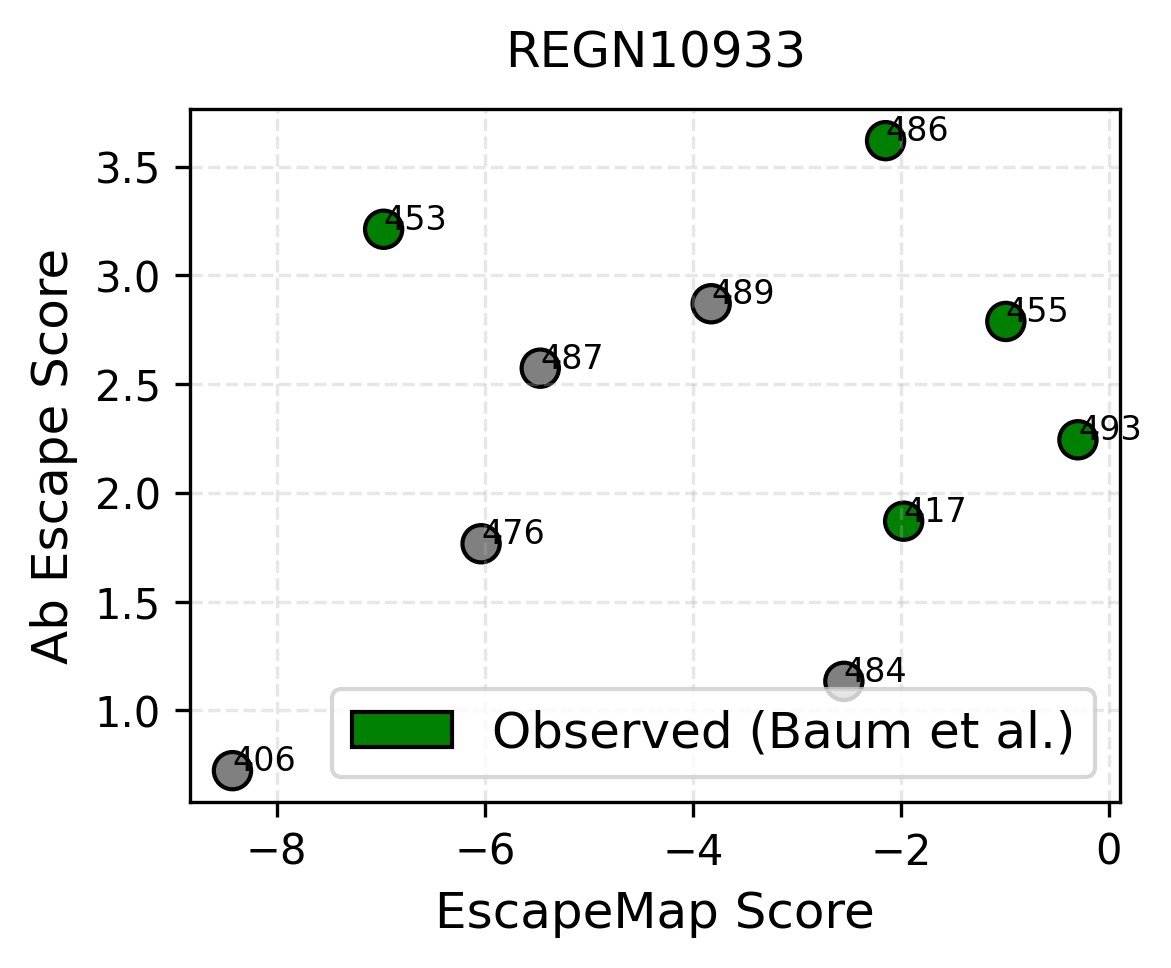

In [115]:
# Sort the dataframe by -deltaE_AB and select top 10 rows
top10_df = df_bloom_avg.sort_values('-deltaE_AB', ascending=False).head(10)
# Define colors based on observed_label
colors = top10_df['observed_label'].map({1: 'green', 0: 'grey'})

# Create scatter plot
plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(top10_df['-deltaE_ACE2_RBM_AB'], top10_df['-deltaE_AB'],
            c=colors, s=80, edgecolors='k')

# # Annotate each point with its site_SARS2 value, slightly offset
for _, row in top10_df.iterrows():
    plt.text(row['-deltaE_ACE2_RBM_AB'] ,  # slight right shift
             row['-deltaE_AB'] ,           # slight upward shift
             str(row['site_SARS2']), fontsize=8, ha='left')



# Label axes and title
plt.xlabel('EscapeMap Score', fontsize=12)
plt.ylabel('Ab Escape Score', fontsize=12)
plt.title('REGN10933', fontsize=12, pad=10)
#add lines x=0 and y=0
# plt.axhline(0, color='gray', linestyle='--', linewidth=1.5)
# plt.axvline(0, color='gray', linestyle='--', linewidth=1.5)
# Legend proxy
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', edgecolor='k', label='Observed (Baum et al.)')]
plt.legend(handles=legend_elements, fontsize=12, loc='best', frameon=True)

plt.grid(alpha=0.3, linestyle='--')
plt.show()


In [116]:
import pandas as pd
print('ab_name_2:',ab_names[ab_index_2])
# Assume c_values and other required variables are defined
results = []
concentrations = torch.full((29,), -25)

print('c:', c)
concentrations[ab_index_2] = c
model=load_escape_map_from_csv(em_path)
model.raw_concentrations=model.raw_concentrations*0-12
#print concentration
print('concentration:',model.raw_concentrations)
model.raw_concentrations[ab_index_2] = c
# for s in bloom_sequences:
#     print(s)

energies = [model(s) for s in bloom_sequences]

df_bloom['E_ACE2_RBM_AB'] = energies
E_wt = model(WT_seq).item()
df_bloom['-deltaE_ACE2_RBM_AB'] = E_wt- df_bloom['E_ACE2_RBM_AB']




concentrations = torch.full((29,), -25)
concentrations[ab_index_2] = c
model=load_escape_map_from_csv(em_path)
model.raw_concentrations=model.raw_concentrations*0-12
model.raw_ace2=-12

model.raw_beta=-10
#print concentration
print('concentration:',model.raw_concentrations)
model.raw_concentrations[ab_index_2] = c
energies = [model(s) for s in bloom_sequences]
df_bloom['E_AB'] = energies
E_wt = model(WT_seq)
df_bloom['-deltaE_AB'] = E_wt - df_bloom['E_AB']
#keep only one nucleotide away
# df_bloom_trimmed = df_bloom[df_bloom['one_nucleotide_away']]
# df_bloom_avg = df_bloom_trimmed.groupby(['site_SARS2']).mean().reset_index()


df_bloom_avg = df_bloom.groupby('site_SARS2').agg(lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.iloc[0]).reset_index()
df_bloom_avg
    

    


ab_name_2: REGN10987
c: -5
concentration: [-12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12.]
concentration: [-12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
 -12.]


,site_SARS2,site_RBD,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg,sequence,E_ACE2_RBM_AB,-deltaE_ACE2_RBM_AB,E_AB,-deltaE_AB
0,349,19.0,S,A,S349A,S19A,-1.153684,-1.152105,-1.152105,-1.941053,-1.807895,-1.875263,NITNLCPFGEVFNATRFAAVYAWNRKRISNCVADYSVLYNSASFST...,-1467.788574,-9.245625,7.715383,-0.232145
1,350,20.0,V,A,V350A,V20A,-2.873333,-2.721667,-2.798889,-2.285000,-2.210000,-2.247222,NITNLCPFGEVFNATRFASAYAWNRKRISNCVADYSVLYNSASFST...,-1462.486084,-14.548157,8.383212,-0.899974
2,351,21.0,Y,A,Y351A,Y21A,-1.035789,-1.073158,-1.055263,-1.898421,-1.785789,-1.842632,NITNLCPFGEVFNATRFASVAAWNRKRISNCVADYSVLYNSASFST...,-1466.103882,-10.930516,7.675364,-0.192125
3,352,22.0,A,C,A352C,A22C,-0.310000,-0.360526,-0.335263,-0.957368,-0.898421,-0.927368,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,-1466.645752,-10.388517,7.723203,-0.239965
4,353,23.0,W,A,W353A,W23A,-1.598421,-1.606842,-1.603684,-2.225263,-2.206842,-2.214211,NITNLCPFGEVFNATRFASVYAANRKRISNCVADYSVLYNSASFST...,-1463.792114,-13.242162,7.608703,-0.125464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,522,192.0,A,C,A522C,A192C,-0.003158,-0.018947,-0.011053,-0.051579,-0.177895,-0.115263,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1467.183960,-9.850335,7.720195,-0.236957
174,523,193.0,T,A,T523A,T193A,-0.018333,-0.036667,-0.028333,-0.258333,-1.110000,-0.686667,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1465.365112,-11.669169,7.664445,-0.181206
175,524,194.0,V,A,V524A,V194A,-0.552000,-0.034000,-0.294000,0.026000,-0.636000,-0.306000,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1467.222534,-9.811670,7.694462,-0.211224
176,525,195.0,C,A,C525A,C195A,-0.203889,-0.095556,-0.150000,-0.352222,-0.620000,-0.487778,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,-1463.512695,-13.521633,7.702931,-0.219692


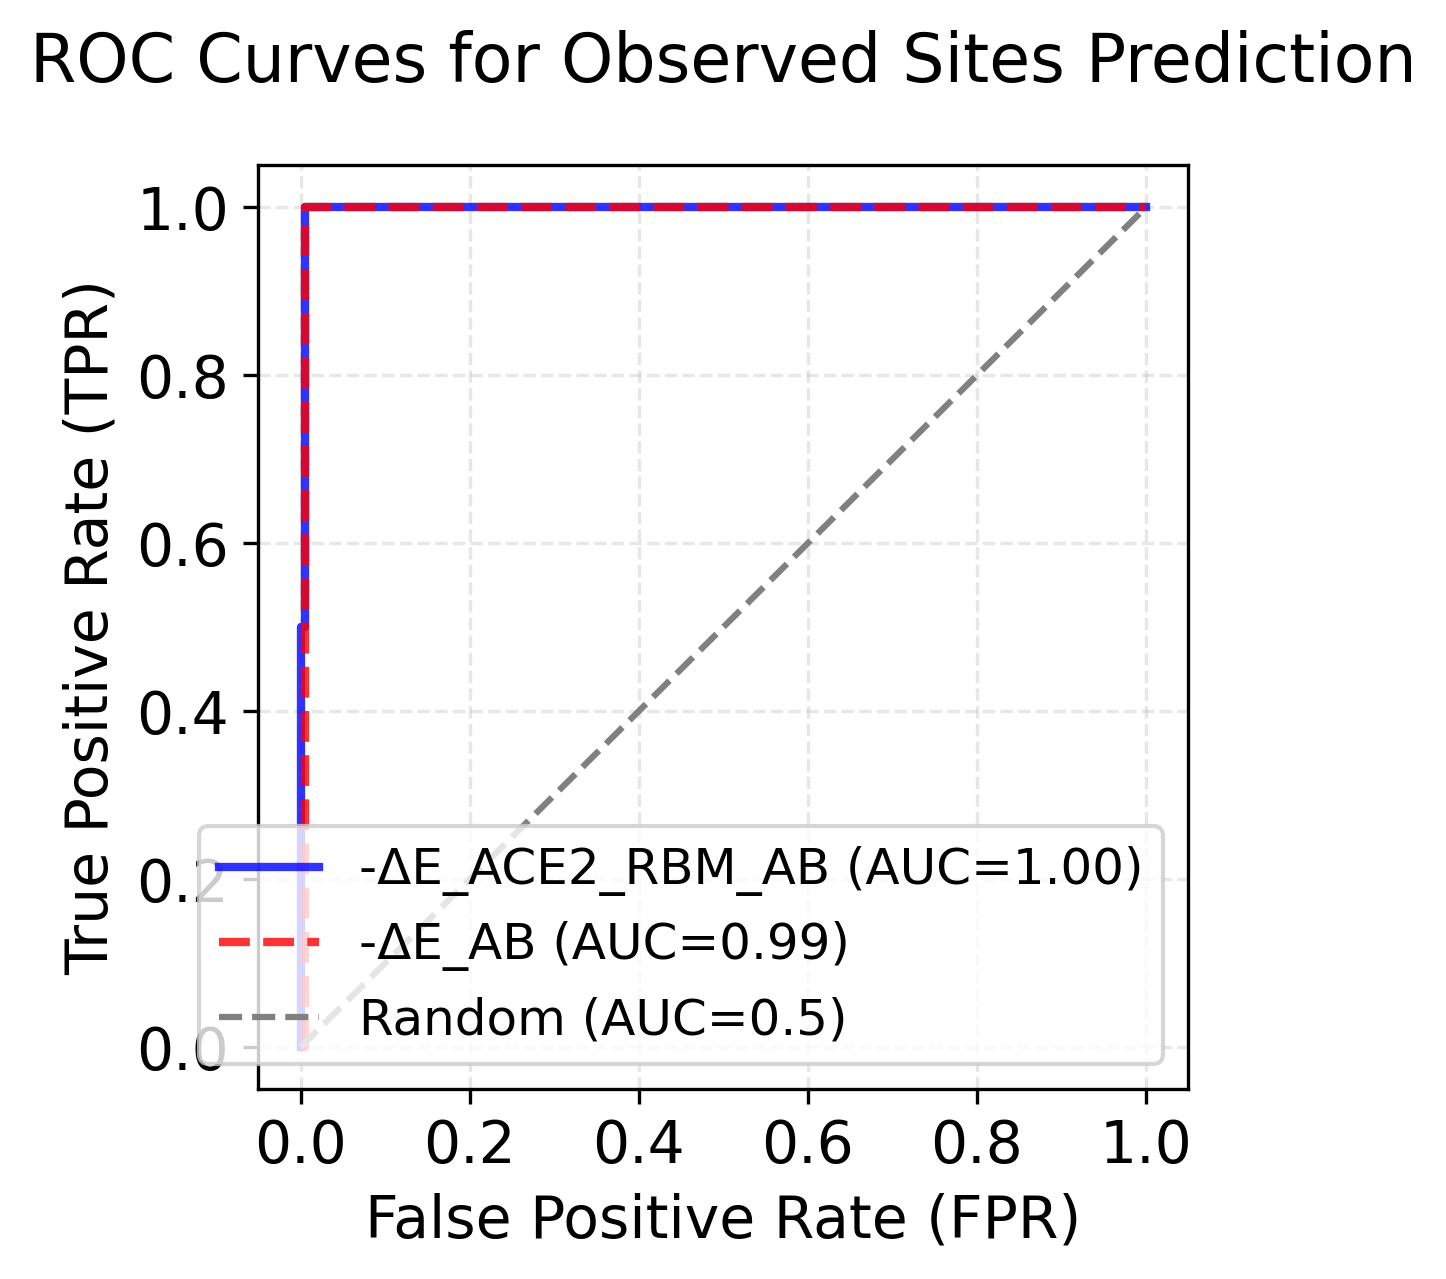

In [117]:
# Setup for plotting
observed_sites=[444,445]


df_bloom_avg['observed_label'] = df_bloom_avg['site_SARS2'].isin(observed_sites).astype(int)

# Compute ROC curves
fpr1, tpr1, _ = roc_curve(df_bloom_avg['observed_label'], df_bloom_avg['-deltaE_ACE2_RBM_AB'])
auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(df_bloom_avg['observed_label'], df_bloom_avg['-deltaE_AB'])
auc2 = auc(fpr2, tpr2)

# Plot
plt.figure(figsize=(4, 4), dpi=300)

plt.plot(fpr1, tpr1, linestyle='-', color='b', linewidth=2, alpha=0.8, 
         label=f"-ΔE_ACE2_RBM_AB (AUC={auc1:.2f})")
plt.plot(fpr2, tpr2, linestyle='--', color='r', linewidth=2, alpha=0.8, 
         label=f"-ΔE_AB (AUC={auc2:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label='Random (AUC=0.5)')

plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curves for Observed Sites Prediction', fontsize=16, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=12, frameon=True)
plt.grid(alpha=0.3, linestyle='--')
plt.show()

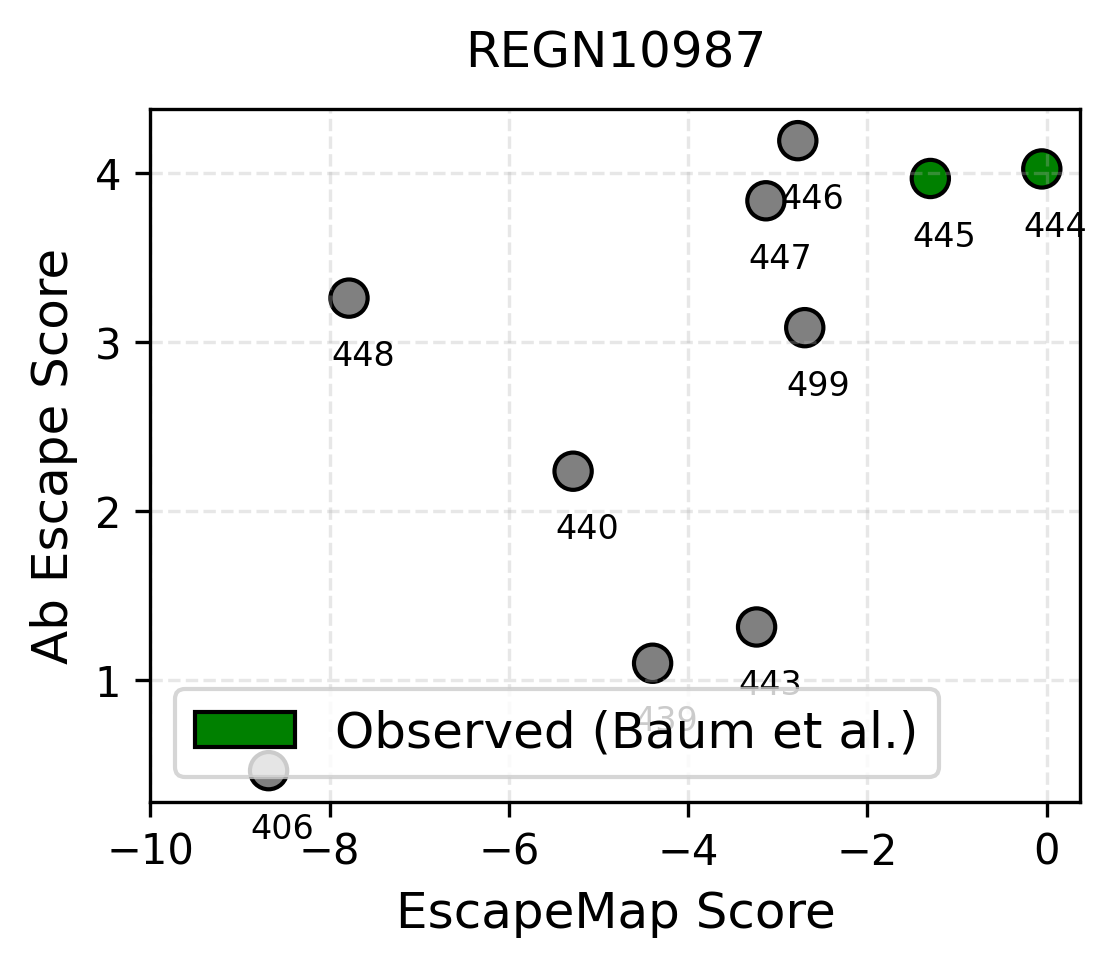

In [120]:
# Sort the dataframe by -deltaE_AB and select top 10 rows
top10_df = df_bloom_avg.sort_values('-deltaE_AB', ascending=False).head(10)

# Define colors based on observed_label
colors = top10_df['observed_label'].map({1: 'green', 0: 'grey'})

# Create scatter plot
plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(top10_df['-deltaE_ACE2_RBM_AB'], top10_df['-deltaE_AB'],
            c=colors, s=80, edgecolors='k')

# Annotate each point with its site_SARS2 value, slightly offset
for _, row in top10_df.iterrows():
    plt.text(row['-deltaE_ACE2_RBM_AB'] - 0.2,  # slight right shift
             row['-deltaE_AB'] - 0.4,           # slight upward shift
             str(row['site_SARS2']), fontsize=8, ha='left')



# Label axes and title
plt.xlabel('EscapeMap Score', fontsize=12)
plt.ylabel('Ab Escape Score', fontsize=12)
plt.title('REGN10987', fontsize=12, pad=10)
#add lines x=0 and y=0
# plt.axhline(0, color='gray', linestyle='--', linewidth=1.5)
# plt.axvline(0, color='gray', linestyle='--', linewidth=1.5)
# Legend proxy
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', edgecolor='k', label='Observed (Baum et al.)'),
              ]
plt.legend(handles=legend_elements, fontsize=12, loc='lower left')
# Get min and max values of x-axis
x_min, x_max = plt.xlim()

# Set x-ticks as integers within the range
plt.xticks(np.arange(np.floor(x_min), np.ceil(x_max) + 1, 2))
plt.grid(alpha=0.3, linestyle='--')
plt.show()
